#  Question 3 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

In [1]:
#import modules and important math things
from math import exp
import numpy as np
import matplotlib.pyplot as plt
# for Boltzmann's contstant, speed of light, Plack's constant
import scipy.constants

# Part A (Exercise 6.10)

Here we want to write a program to solve for the equation $x=1-e^{-cx}$ using the relaxation method. We consider the special case where $c=2$, and solve to an accuracy of at least $10^{-6}$.

First, we will change the equation to the form x=f(x). Then, we guess an initial value $x$ to find the true solution of the equation $x^*$. We will plug initial guess variable $x'$ on the right hand side of the equation and get a new value x' on the left-hand side. We repeat the process until we get a value sufficiently close to our desired $x^*$. To do that, we will use while loop until the error becomes smaller than $10^{-6}$. The formula for error is given by
\begin{equation} 
\frac{x-x'}{1-\frac{1}{f'(x)}}=\varepsilon '
\end{equation}

In [2]:
c=2 #set the value c
accuracy=1e-6 #set the desired accuracy
error=1.0 # set an initial value of error (> accuracy)
x1=1.0 #set the initial guess of solution

while error>accuracy: # loop until error is smaller than desired accuracy
    # assign new value to x1 with equation, and old x1 value to x2
    x1,x2=1-exp(-c*x1),x1
    #calculate the error for the newly calculated value x1
    error = abs((x2-x1)/(1-1/(c*exp(-c*x2))))

print("Final x value using Relaxation Method is: ",x1)

Final x value using Relaxation Method is:  0.7968126311118457


Exercise 6.10 (b) 

We now want to modify this simple loop to calculate solutions for values of $c$ from 0 to 3 in steps of 0.01. At the end we will make a plot of $x$ as a function of $c$. 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


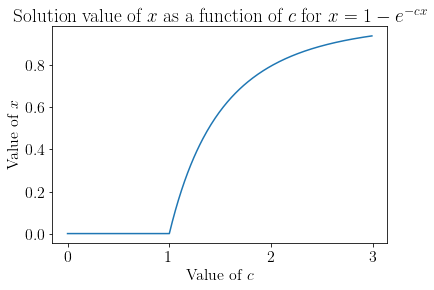

In [3]:
cmax=3.0 #set the end value of c
step=0.01 # set the setp size

xvals=[] # initialize array to store solutions of x
crange = np.arange(0.0,cmax,step) #array with values of c from 0 to 3 

#loop for all values of c
for c in crange:
    x1=1.0 # set initial guess as before
    error=1.0 # set initial error as before
    
    # loop until error is smaller than desired accuracy
    while error>accuracy:
        # assign new value to x1 with equation, and old x1 value to x2
        x1,x2=1-exp(-c*x1),x1
        #calculate the error for the newly calculated value x1
        error= abs((x2-x1)/(1-1/(c*exp(-c*x2))))
    xvals.append(x1) # store solutions for x in array

# Plot the result!
plt.rc('font', family='serif') # make plot pretty with Latex
plt.rc('font', size=16)
plt.rc('text', usetex=True)
plt.plot(crange,xvals) # plot our results
plt.title(r"Solution value of $x$ as a function of $c$ for $x=1-e^{-cx}$")
plt.xlabel(r"Value of $c$")
plt.ylabel(r"Value of $x$")
plt.show()

This graph shows the solution of the given equation as a function of constant c. There is a very clear phase transition transition from a regime where $x=0$ to a regime of nonzero $x$. 

# Part B (Exercise 6.11)

We will use the same equation as part A but modify it to print out the number of iterations it takes to converge to a solution accurate  to $10^{-6}$. To get the number of iterations, I will set a counter and increment it until it reaches the solution.


In [4]:
c=2 #set the value c
accuracy=1e-6 #set the desired accuracy
error=1.0 # set an initial value of error (> accuracy)
x1=1.0 #set the initial guess of solution
count = 0 # set counter

while error>accuracy: # loop until error is smaller than desired accuracy
    # assign new value to x1 with equation, and old x1 value to x2
    x1,x2=1-exp(-c*x1),x1
    #calculate the error for the newly calculated value x1
    error = abs((x2-x1)/(1-1/(c*exp(-c*x2))))
    count+=1 # increment counter

print("Number of iterations to converge to a solution: ", count)

Number of iterations to converge to a solution:  14


To be honest, it is quite a crude method, but 14 iterations really is quite fast! That's nothing for a computer. Even our crude relaxation method is quite effective and fast all things considered.

We will now compare the standard Relaxation Method to the Overrelaxation Method. To make the comparison easy we will use the same equation. In overrelaxation method the new variable is given by $x'=(1+\omega)f(x)-\omega x$. This method can make the calculation faster by delibertely overshooting the calculated value if we can expect it to fall short of the true solution, leading to a faster convergence. With $\omega$. the change of value $x$ is faster. The error of new variable is given by 
\begin{equation} 
\epsilon '=\frac{x-x'}{1-\frac{1}{(1+\omega)f'(x)-\omega}}
\end{equation}

We follow the same code as before to test, but simply modify the calculation line:

In [5]:
# Using Overrelaxation

c=2 #set the value c
accuracy=1e-6 #set the desired accuracy

countarray=[]  # initialize list to store iterations for different w
wrange=np.arange(0.1,1,0.1) #array of w from 0.1 to 1 with steps of 0.1

for w in wrange:
    count = 0 # set counter
    error=1.0 # set an initial value of error (> accuracy)
    x1=1.0 #set the initial guess of solution
    while error>accuracy: # loop until error is smaller than desired accuracy
        # assign new value to x1 with equation, and old x1 value to x2
        x1,x2=(1-exp(-c*x1))*(1+w)-w*x1,x1
        #calculate the error for the newly calculated value x1
        error= abs((x2-x1)/(1-1/((1+w)*(c*exp(-c*x2))-w)))
        count+=1 # increment counter
    countarray.append(count) #store iteration number to array

print("Minimum number of iterations to converge to a solution: ", min(countarray))
print("w value used for minimum iterations: ", wrange[countarray.index(min(countarray))])

Minimum number of iterations to converge to a solution:  4
w value used for minimum iterations:  0.5


Here we have showed that overrelaxation can be MUCH faster than relaxation, cutting total iterations from 14 to only 4 when we had our optimal $\omega$. While it may not always be the case if $\omega$ is bad (in our case it in fact was strictly better), in general the overrelaxation method is faster than the normal relaxation method.


(d) In what cases would using a negative $\omega$ would be faster than the ordinary relaxation method?

When our initial guess(starting value of estimate solution) is greater than the true solution, a negative $\omega$ will give faster (fewer iterations) calculation. For intuition, imagine the explanation of overrelaxation in reverse.

# Part C (Exercise 6.13)

We will solve the equation $5e^{x}+x-5=0$

To solve this equation we will use three different methods, binary search, relaxation, and Newton's method. To compare the methods we will once again count the number of iterations for each method and then compare on their relative efficiencies.

Note: There is an obvious root at x = 0, but we will find other root.

For the binary search method, we will need to find two initial x values that bracket the root. To do this, we will plot the function and estimate some good starting values from there. For the comparison between the 3 methods, we will start at the same initial x value (so choose one of the initial values from the binary search
method and use it as our starting value for the relaxation and Newton's methods). Then, we will try different initial values, some very far from the root to get a sense of how efficient the methods are at finding the root.

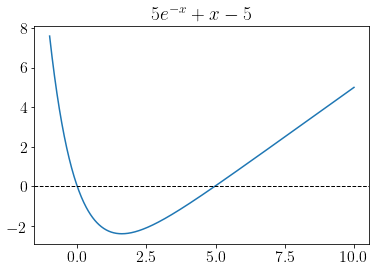

In [6]:
#define function 
def function(x):
    return 5*exp(-x)+x-5

#plot the graph to see how it looks and decide the initial guess for the problem
x=np.linspace(-1,10,1000) # array of x values
y=[] # initialize array to store y values
for i in x: # calculate y values
    y.append(function(i))
plt.plot(x,y) # plot result
plt.title(r'$5e^{-x}+x-5$')
plt.axhline(y=0.0, color='black', linestyle='--',linewidth=1)
plt.show()

This graph show that the root is located near $x=5$. We will take points around this as our initial values.

For Binary search Method, we will set the initial pair of points x1 and x2 , and set the desired accuarcy. We then calculate the midpoint $x'$ of x1 and x2 then evaluate the function at the midpoint. If f(x') has the same sign as f(x1) then set x1=x' otherwise, set x2=x'. If the distance of x1 and x2 is greater than the target accuracy repeat the process using a while loop.

In [7]:
#Binary search method

# Set the Initial guess points
x1=4.0
x2=6.0


#define the function of binary search method
def binary(x1,x2):
    error=1.0 # initial error
    count=0 # set counter
    accuracy=1e-6 # desired accuracy
    while error>accuracy:  #loop unitl error is smaller than accuracy
        xmid=(0.5)*(x1+x2)  #find mid point
        # if f(x') has the same sign as f(x1) then set x1=x'
        if np.sign(function(x1))== np.sign(function(xmid)):
            x1,x2=xmid,x2
        else:
        # if f(x') has the same sign as f(x2) then set x2=x'
            x1,x2=x1,xmid 
        error= abs(x2-x1)  #calculate the error
        count+=1 #count the number
    
    return count, xmid  #return number of iterations and final solution

Use Relaxation Method to get the solution 

In [8]:
# Relaxation method, exactly as before

def relaxation(x1):
    error=1.0
    accuracy=1e-6
    count=0

    while error>accuracy:
        x1,x2=5-5*exp(-x1),x1
        error= abs((x2-x1)/(1-1/(5*exp(-x2))))
        count+=1
    return count,x1

Newton's method evaluate the slope at the initial guess value and find the new value x'.
The equation finding new value x' is given by
\begin{equation} 
\frac{f(x))}{f'(x)}=x-x'=\delta
\end{equation}
and the error of the old estimate x is given by
\begin{equation} 
\ x'-x=\epsilon
\end{equation}


Define function using Newton's Method

In [9]:
#Newton's Method
def newton(x):
    delta=1.0 # set the value for initial error
    accuracy=1e-6
    count=0
    # loop until the error is smaller than accuracy
    while abs(delta)>accuracy: 
        delta=(function(x))/(-5*exp(-x)+1) #calculate the error 
        x -= delta # assign the new variable x'
        count+=1
    return count,x #return the total iteration number and solution

We now have everything we need to compare the three methods. Let's start with a close initial guess $x=6$ (true value $x=4.9$

In [10]:
#when start x value is 6 and the true solution is 4.9
print('Iterations for Binary method :',binary(4,6)[0]) 
print('Iterations for Relaxation method :',relaxation(6)[0])
print('Iterations for Newton method :',newton(6)[0])

Iterations for Binary method : 21
Iterations for Relaxation method : 4
Iterations for Newton method : 4


It seems the Binary method is much slower than the other two! Newton's and the Relaxation methods both converged very quickly while the binary search required many more iterations to converge. What about when our initial guess is very far from the true solution, for example $x=100$?

In [11]:
#when start x value is 100 and the true solution is 4.9
print('Iterations for Binary method :',binary(4,100)[0]) 
print('Iterations for Relaxation method :',relaxation(100)[0])
print('Iterations for Newton method :',newton(100)[0])

Iterations for Binary method : 27
Iterations for Relaxation method : 1
Iterations for Newton method : 4


This seems a but off, while the Binary method and Newton method seem correct, the Relaxation method claims to have found a solution within error tolerance in only 1 iteration. I dont belive it. Let's print out the solution it actually got:

In [12]:
print('Solution value Binary method :',binary(4,100)[1]) 
print('Solution value Relaxation method :',relaxation(100)[1])
print('Solution value Newton method :',newton(100)[1])

Solution value Binary method : 4.965113878250122
Solution value Relaxation method : 5.0
Solution value Newton method : 4.965114231744276


As we expected. The true solition should be around 4.96, but the Relaxation method stopped at 5.0. It seems we have found a regime where the algorith breaks! To investigate, let's print out a few lines in the calculation:

In [13]:
# do everything exactly as before
error=1.0
accuracy=1e-6
count=0
x1=100
while error>accuracy:
    x1,x2=5-5*exp(-x1),x1
    error= abs((x2-x1)/(1-1/(5*exp(-x2))))   
    count+=1

print('The final error is :',error)
print('The denominator in the error formula is :',(1-1/(5*exp(-x2))))

The final error is : 1.7670360886098972e-41
The denominator in the error formula is : -5.376234283632271e+42


Aha! It turns out that our point was so far away that when we raised $e^{-100}$ it returnes a very small value, in turn making the denominator very large. This results in a very small error, much smaller than our desired accuracy. It is thus not the method itself that breaks, but rather our error formula is no longer valid, and we would need a better way to estimate the error, such as doing it manually. For now we conclude that we have discovered a problem with the Relaxation Method, and hence we know that the others are more reliable.

**Conclusion**: Newton's Method is the fastest method to find the solution, wheras the Binary search method 
takes the most iterations to find the solution. However, there are disadvantages in all of the methods. A disadvantages for Newton's Method is that if we choose the initial guess on the wrong side 
of the true solution, since the method use the slope to find the root, it will fail to find the solution. The Binary search method on the other hand is guaranteed to find a solution, but it is much slower. Another disadvantage of the
Binary serach method is that it can be only applied to the odd number of roots equation since the first 
two guess of the function should be on opposite sides. Finally for the relaxation method, while it is also faster than the Binary method, you have to ensure that the initial guess is sufficiently close or you run into problems as we demonstrated here. The equation also needs to be in certain form otherwise it is useless. In summary, make sure you know what you are doing before you do it!

Part (b):

Find a value for the displacement constant $b=\frac{hc}{k_bx}$
where $h$ is planck constant and $c$ is speed of light and $k$ is boltzmann constant and $x$ is our solution

In [14]:
#Find a value for the displacement constant "b=hc/k(b)x"
# note: the equation we used above is the same for this exercise
# therefore we can simply call newtons method to get an answer for x
# then plug the answer into the formula above to get b

h = scipy.constants.h # set Planck's constant
c = scipy.constants.c # set speed of light
k = scipy.constants.k # set Boltzmann's constant


b=h*c/(k*newton(6)[1]) # do calculation of formula above
print("The displacement constant is :",b)

The displacement constant is : 0.0028977729145262155


Part (c): 

Find the temperature fo the sun using $T=b/\lambda$

In [15]:
#(c)
lamda=502e-9
Temperature=b/lamda
print("Temperature (k) of the sun is", Temperature)

Temperature (k) of the sun is 5772.456005032302
